# **Data Visualization**

## Objectives

* The client is interested to have a study to visually differentiate a parasitized and uninfected cell.

## Inputs

- inputs/datasets/cherry-leaves/test
- inputs/datasets/cherry-leaves/train
- inputs/datasets/cherry-leaves/validation 

## Outputs

- Image shape embeddings pickle file.
- Mean and variability of images per label plot.
- Plot to distinguish the contrast between parasite-contained and uninfected cell images.
- Generate code that answers business requirement 1 and can be used to build an image montage on the Streamlit dashboard.

## Additional Comments

- The avarage dimension of the raw images is 256px width by 256px height
- Looking at the avarage images:
   - the healthy leaves appear to have a more uniform green colour than the powdery mildew leaf.
   - and the veins appear more visible in the mildew leaf compared to the healthy leaf
- From the image montage the mildew leaves have white streaks on them often along the leaf veins.



---

# Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# sns.set_style("white")
from matplotlib.image import imread

# Change working directory

In [2]:
import os
current_dir = os.getcwd()
print("Current directory:", current_dir)

Current directory: /workspace/mildew_cherry_detection/jupyter_notebooks


In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
work_dir = os.getcwd()
print("New current directory:", work_dir) 

New current directory: /workspace/mildew_cherry_detection


## Set input directories

In [10]:
# Define paths
data_dir = '/inputs/datasets/raw'
train_dir = '/inputs/datasets/train'
val_dir = '/inputs/datasets/val'
test_dir = '/inputs/datasets/test'

## Set output directory

In [8]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

## Set labels

Verify if the train directory.

In [12]:
# Verify if the train directory exists
train_dir = 'inputs/datasets/train'
train_dir_full_path = os.path.join(os.getcwd(), train_dir)
print("Full path to train directory:", train_dir_full_path)

Full path to train directory: /workspace/mildew_cherry_detection/inputs/datasets/train


In [13]:
# Check if the directory exists
if os.path.exists(train_dir_full_path):
    print(f"Directory exists: {train_dir_full_path}")
else:
    print(f"Directory does not exist: {train_dir_full_path}")

Directory exists: /workspace/mildew_cherry_detection/inputs/datasets/train


Set labels from the train dataset list of directory 

In [15]:
# Set the labels
labels = os.listdir(train_dir)
print('Label for the images are', labels)


Label for the images are ['healthy', 'mildew']


---

# Data visualisation of image data

## Image Shape 
 Compute average images size on train set.

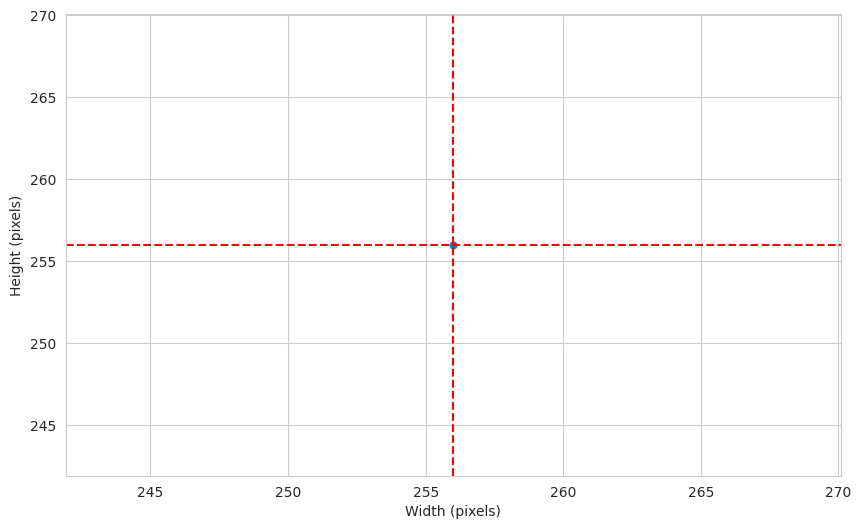

Width average: 256.0 
Height average: 256.0


In [25]:
import os
from matplotlib.image import imread
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Function to calculate image dimensions
def calculate_image_dimensions(image_path):
    dimensions = [imread(os.path.join(image_path, label, img)).shape for label in os.listdir(image_path) for img in os.listdir(os.path.join(image_path, label))]
    return dimensions

# Get image dimensions
dimensions = calculate_image_dimensions(train_dir)
dim1, dim2 = zip(*[(d[0], d[1]) for d in dimensions])

# Plot image dimensions
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
dim1_mean, dim2_mean = np.mean(dim1), np.mean(dim2)
plt.axvline(x=dim2_mean, color='r', linestyle='--')
plt.axhline(y=dim1_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")




Set image shape for the model

In [28]:
# Define the path to save the model
file_path = "/workspace/mildew_cherry_detection/models" 

# Set and save image shape
image_shape = (int(dim1_mean), int(dim2_mean), 3)
joblib.dump(image_shape, os.path.join(file_path, "image_shape.pkl"))

['/workspace/mildew_cherry_detection/models/image_shape.pkl']

set a manual shape for the model

In [29]:
manual_shape = (64, 64, 3)
joblib.dump(manual_shape, os.path.join(file_path, "image_shape_manual.pkl"))

['/workspace/mildew_cherry_detection/models/image_shape_manual.pkl']

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
